## Revisión "Eliminación por Bloques"

Con el algoritmo de eliminación por bloques lo que se busca es eliminar subconjuntos de variables para tener un sistema de ecuaciones lineales más pequeño y la solución sea más eficiente. La primera forma en que se propone revisar el algoritmo es generar tanto X's como matrices aleatorias de nxn (cuadradas) para posteriormete obtener la matriz B, que se obtiene de la siguiente manera: $Ax = B$.
Posteriormente resolvemos el sistema con el algoritmo por bloques y obtenemos X_estimada, la cual es comparada con la X (original) del sistema anteriormente generado.

In [1]:
import numpy as np
import scipy
import scipy.linalg
import pprint
import pandas as pd
import crea_matrices
import time
import EliminacionPorBloques

In [2]:
def revision_bloques(num_corridas,dim_limite_inf,dim_limite_sup,entradas_lim_inf,entradas_lim_sup):
    """
     Parametros
    ----------   
    num_corridas : numero de veces que queremos probar el algoritmo de "Eliminacion por bloques"
    dim_limite_inf : es el límite inferior de las entradas para la matriz random a generar.
    dim_limite_sup : es el límite superior de las entradas para la matriz random a generar.
    entradas_lim_inf : es el límite inferior del tamaño de la matriz, buscamos matrices de nxn.
    entradas_lim_sup : es el límite superior del tamaño de la matriz, buscamos matrices de nxn.
        
    Salidas
    -------
    resultados : Un dataframe con el nombre de resultados, una vez evaluado el algoritmo con le número de corridas ingresadas.
    """
    dimension=[]
    solucion_bloques=[]
    tiempo_bloques=[]
    error_absoluto=[]
    
    for i in range(0,num_corridas):
        
        #modulo que crea la matriz random
        A,n=crea_matrices.crea_matrices(dim_limite_inf,dim_limite_sup,entradas_lim_inf,entradas_lim_sup)
        X=np.random.randint(entradas_lim_inf,entradas_lim_sup,size=(n))
        B=A@X   
        dimension.append(n)
        
        start_time=time.time()
        X_algoritmo=EliminacionPorBloques.solve_blocks(A,B)
        end_time=time.time()
        tiempo_total = end_time-start_time      
        tiempo_bloques.append(tiempo_total)
        
        error_abs=np.mean(np.fabs(X_algoritmo-X))
        error_absoluto.append(error_abs)
        
        if(np.allclose(X,X_algoritmo)==True):
            status='Correcto'
            solucion_bloques.append(status)
        else:
            pprint.pprint('Incorrecto para A igual a:')
            pprint.pprint(A)
            status='Incorrecto'
            solucion_bloques.append(status)

        
    data={'dimension':dimension, 'tiempo_bloques':tiempo_bloques,'solucion_bloques':solucion_bloques,'error_abs':error_absoluto}       
    resultados=pd.DataFrame(data)
    return resultados

In [3]:
bloques=revision_bloques(5,10**2,10**3,-99,99)

In [4]:
bloques.sort_values(by=['dimension'],inplace=True)

In [5]:
bloques

,dimension,tiempo_bloques,solucion_bloques,error_abs
4,101,0.246941,Correcto,1.614772e-11
1,275,3.544258,Correcto,8.604931e-12
2,301,4.535686,Correcto,3.597899e-12
0,379,9.374272,Correcto,2.394174e-10
3,498,19.695263,Correcto,1.151005e-10


In [6]:
dimension = bloques['dimension']
tiempo=bloques['tiempo_bloques']

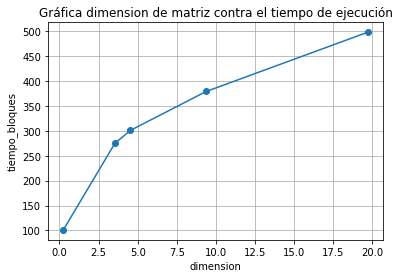

In [8]:
import matplotlib.pyplot as plt
plt.plot(tiempo,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('dimension')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()

En la segunda opción de revision, lo que hacemos es que a partir de generar tanto X's como matrices aleatorias de nxn (cuadradas) para posteriormete obtener la matriz B. Se comprueba que el producto de $AX(estimada)= B$

In [9]:
def revision_bloques_v2(num_corridas,dim_limite_inf,dim_limite_sup,entradas_lim_inf,entradas_lim_sup):
    """
     Parametros
    ----------   
    num_corridas : numero de veces que queremos probar el algoritmo de "Eliminacion por bloques"
    dim_limite_inf : es el límite inferior de las entradas para la matriz random a generar.
    dim_limite_sup : es el límite superior de las entradas para la matriz random a generar.
    entradas_lim_inf : es el límite inferior del tamaño de la matriz, buscamos matrices de nxn.
    entradas_lim_sup : es el límite superior del tamaño de la matriz, buscamos matrices de nxn.
        
    Salidas
    -------
    resultados : Un dataframe con el nombre de resultados, una vez evaluado el algoritmo con le número de corridas ingresadas.
    """
    dimension=[]
    solucion_bloques=[]
    tiempo_bloques=[]
    error_absoluto=[]
    
    for i in range(0,num_corridas):
        
        #modulo que crea la matriz random
        A,n=crea_matrices.crea_matrices(dim_limite_inf,dim_limite_sup,entradas_lim_inf,entradas_lim_sup)
        X=np.random.randint(entradas_lim_inf,entradas_lim_sup,size=(n))
        B=A@X   
        dimension.append(n)
        
        start_time=time.time()
        X_algoritmo=EliminacionPorBloques.solve_blocks(A,B)
        end_time=time.time()
        tiempo_total = end_time-start_time      
        tiempo_bloques.append(tiempo_total)
        
        error_abs=np.mean(np.fabs(X_algoritmo-X))
        error_absoluto.append(error_abs)
        
        if(np.allclose(A@X_algoritmo,B)==True):
            status='Correcto'
            solucion_bloques.append(status)
        else:
            pprint.pprint('Incorrecto para A igual a:')
            pprint.pprint(A)
            status='Incorrecto'
            solucion_bloques.append(status)

        
    data={'dimension':dimension, 'tiempo_bloques':tiempo_bloques,'solucion_bloques':solucion_bloques,'error_abs':error_absoluto}       
    resultados=pd.DataFrame(data)
    return resultados

In [10]:
bloques=revision_bloques_v2(5,10**2,10**3,-99,99)

In [11]:
bloques.sort_values(by=['dimension'],inplace=True)

In [12]:
bloques

,dimension,tiempo_bloques,solucion_bloques,error_abs
1,147,0.793098,Correcto,2.904979e-12
2,237,3.002082,Correcto,6.470770e-11
0,355,9.355293,Correcto,4.047418e-11
3,488,24.136392,Correcto,3.586582e-11
4,523,28.784449,Correcto,3.178924e-11


In [14]:
dimension = bloques['dimension']
tiempo=bloques['tiempo_bloques']

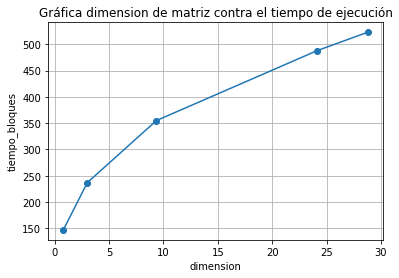

In [15]:
import matplotlib.pyplot as plt
plt.plot(tiempo,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('dimension')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()